# Entrepreneurial Ventures Data Analysis

## Introduction

This Case study contains anonymized data from a pre-program survey responses from entrepreneurs who applied to accelerators participating in the Global Accelerator Learning Initiative based out of Emory University.

Our main objectives of the case study will be to analyze and visualize data to determine key insights that will be helpful for us to further undertand this data. Let's start by loading the data into our Notebook. We'll use pandas DataFrames to store this data. Let's also load our data visualization libraries matplotlib

In [149]:
# Importing libraries

import pandas as pd

import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [150]:
# reading in excel data

all_ventures = pd.read_excel('~/Desktop/Entreprenuers.xlsx' ,encoding ='uft-8')

In [151]:
# Ensure all the data has been imported

all_ventures.shape

(1856, 38)

In [168]:
# Doing descriptive statistics of the data

all_ventures.describe().round()

,application_year,selected,showup,finished,info_has_website,info_founding_year,fins_revenues_m1,fins_revenues_sincefound,fins_ft_employees_m1,fins_pt_employees_m1,found_name1_present,found_name2_present,found_name3_present,found_additional_cnt,found_name1_age,found_name2_age,found_name3_age,Average Team Age
count,1856.0,1034.0,1021.0,1828.0,1856.0,1848.0,1856.0,1.856000e+03,1856.0,1856.0,1855.0,1855.0,1855.0,1705.0,1815.0,1469.0,845.0,1815.0
mean,2015.0,0.0,0.0,0.0,1.0,2012.0,147508.0,2.157293e+06,8.0,6.0,1.0,1.0,0.0,1.0,36.0,36.0,35.0,36.0
std,1.0,0.0,0.0,0.0,0.0,4.0,723681.0,4.414106e+07,19.0,25.0,0.0,0.0,0.0,5.0,10.0,12.0,12.0,9.0
min,2014.0,0.0,0.0,0.0,0.0,1965.0,0.0,1.000000e+00,1.0,0.0,0.0,0.0,0.0,-3.0,1.0,1.0,1.0,19.0
25%,2015.0,0.0,0.0,0.0,0.0,2011.0,4000.0,7.000000e+03,2.0,0.0,1.0,1.0,0.0,0.0,29.0,28.0,27.0,29.0
50%,2016.0,0.0,0.0,0.0,1.0,2013.0,17400.0,4.000000e+04,4.0,2.0,1.0,1.0,0.0,0.0,33.0,33.0,32.0,34.0
75%,2016.0,0.0,0.0,0.0,1.0,2014.0,74687.0,1.913370e+05,7.0,5.0,1.0,1.0,1.0,1.0,40.0,42.0,41.0,41.0
max,2016.0,1.0,1.0,1.0,1.0,2016.0,18535363.0,1.659025e+09,400.0,500.0,1.0,1.0,1.0,150.0,85.0,82.0,78.0,85.0


From this simple descriptive statistics of the data, some of the few takeaways we can quickly observe are:

   1. The survey has been done over the course of 3 years (2014 -2016)
   2. Our data has ventures founded as early as 1965 to 2016
   3. The average age of the first founder is 35
   
What i would prefer to do now is get more informative insight of the data. So i'll start by determining the trend of the ventures over the three years

In [169]:
# Select required columns from the dataset

vent_countries =  all_ventures[['application_year', 'info_venture_country']]
vent_countries.head()

,application_year,info_venture_country
0,2016,Rwanda
1,2015,Kenya
2,2014,India
3,2016,Mexico
4,2016,Rwanda


In [170]:
# Group by year 

vent_countries_grouped = vent_countries.groupby('application_year').info_venture_country.count()
vent_countries_grouped

application_year
2014     309
2015     496
2016    1051
Name: info_venture_country, dtype: int64

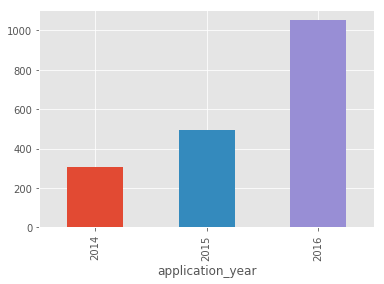

In [172]:
# Plotting the results

vent_countries_grouped.plot(kind ='bar')
plt.show()

Not so surprising, we expected a gradual increase in ventures, in this era, it's easier for people to start ventures that solve problems due to the high rate of technology advancement. People have also become more independent and value the ability to control their work experiences. 

Now that we know this little bit of information, we can now answer a few questions.

### 1. What country has the most ventures?

In [196]:
vent_countries_high = vent_countries.groupby('info_venture_country').application_year.count().sort_values(ascending = False)
vent_countries_high.head(10)

info_venture_country
United States of America       243
Kenya                          225
Mexico                         193
Uganda                         171
India                          156
Nigeria                        121
Colombia                        77
Nicaragua                       62
United Republic of Tanzania     48
Chile                           44
Name: application_year, dtype: int64

I honestly did not expect Kenya to be the second, but we need to remember that this data is based on who was able to take the survey.

### 2. Which sector is mostly ventured into?

In [157]:
# Select required columns

all_sectors = all_ventures [['info_venture_country' ,'info_sector']]
all_sectors.head()

,info_venture_country,info_sector
0,Rwanda,Water
1,Kenya,Energy
2,India,Energy
3,Mexico,Health
4,Rwanda,Energy


In [158]:
all_sectors = all_sectors.groupby('info_sector').info_venture_country.count()


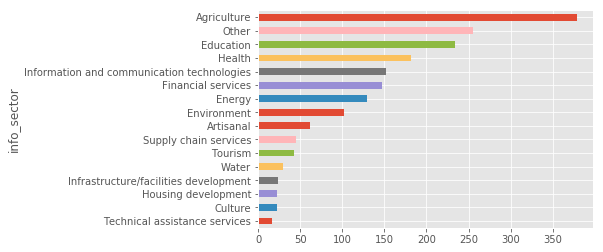

In [178]:
all_sectors.sort_values().plot(kind = 'barh')
plt.show()

It's worth noting that majority of the people tend to venture into the basic human needs space when starting a business, as we can see from the top 3 sectors, excluding "Other".

### 3. Are most Ventures profitable?

In [177]:
# select required columns

profit_sector = all_ventures[['info_sector', 'fins_profit_m1']]


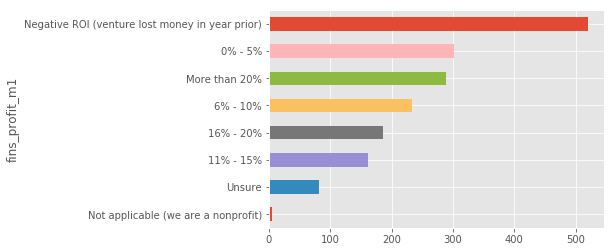

In [179]:
# Group and plot results

profit_sector = profit_sector.groupby('fins_profit_m1').info_sector.count().sort_values().plot(kind = 'barh')
plt.show()

Unfortunately, most of the ventures have a negative return on investment. However, it's worth noting in our data that there has been an increase in ventures over the years and most ventures don't make a profit at least after 3 years. But let's confirm when most of the ventures were founded.

### 4. When were most ventures founded?

In [187]:
# Selecting required columns 

founded_year = all_ventures[['info_venture_country','info_founding_year']]

founding_year = founded_year.groupby('info_founding_year').info_venture_country.count()
founding_year.sort_values(ascending = False).head(10)

info_founding_year
2014.0    373
2015.0    318
2013.0    287
2012.0    276
2011.0    170
2010.0    114
2009.0     88
2016.0     36
2008.0     33
2007.0     28
Name: info_venture_country, dtype: int64

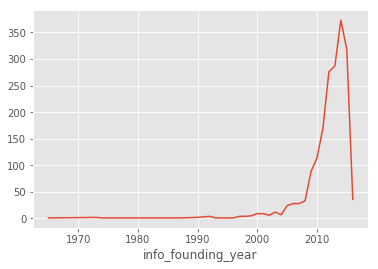

In [189]:
# Plotting the results

founding_year.plot()
plt.show()

Well that gives us more clarity as to why there is a negative ROI

### 5. Which Region has the highest number of ventures?

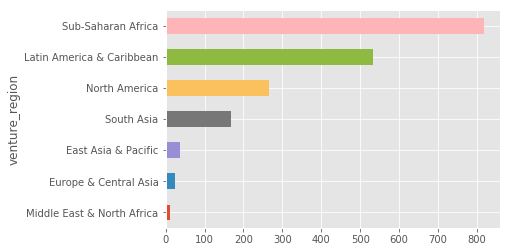

In [191]:
region_vent = all_ventures[['venture_region','info_venture_country']]

region_vent = region_vent.groupby('venture_region').info_venture_country.count().sort_values(ascending = False)

region_vent.sort_values().plot(kind = 'barh')
plt.show()

Based on our insights so far, it was expected to have Africa at the top. But why? In my opinion, entrepreneurship is deemed as a ‘necessity’ at a time of high employment. When unemployment is high and the economy is weaker, people are forced to start small businesses to provide for themselves and their families.

Just one question left for our data.

### 6. What is the Gender of the Founders?

In [163]:
# Select required columns
 
founders_gender = all_ventures[['info_venture_country','found_name1_gender' ]]

founders_gender = founders_gender.groupby('found_name1_gender').info_venture_country.count()
founders_gender

found_name1_gender
F     468
M    1364
Name: info_venture_country, dtype: int64

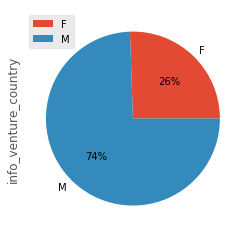

In [194]:
# Plotting the figures

founders_gender.plot(kind = 'pie', autopct='%.0f%%')
plt.legend()
plt.show()

Maybe it shouldn't come as a shock that there is some imbalance between how many male and female there are, but how significant is this imbalance? I'm hoping not to sound controversial, but in addition to cultural and societal factors, we noted in our brief descriptive statistics that the average age for most founders is 35. At this age, women are more drawn to stability in being mothers and over time, both risk and opportunity have limited women into being entrepreneurs.

## Conclusion

The insights we've seen so far have been quite informative, though the biggest takeaway from this case study is that we need more data in order to make accurate insights, for example which countries are leading in ventures. It is highly unlikely Kenya (which was the second) is above a country like China. So one of the best ways in improving data collection would be to identify who will be reading these reports and what the most important information they will need is.Since information is different for each audience, it's important to identify what data they judge to be important. Also more questions about the entrepreneurs would be helpful. For example, "How do they advertise their product/services?" this will help us know which partical advertising tool is more effective based on profits and loss.

 